In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/epl-2018-2019-matches.csv', usecols=['home_team_name', 'away_team_name', 'home_team_goal_timings', 'away_team_goal_timings'])

In [3]:
df = df.astype(str)
df['away_team_goal_timings'].fillna('')
df['home_team_goal_timings'].fillna('')
df.head(3)

,home_team_name,away_team_name,home_team_goal_timings,away_team_goal_timings
0,Manchester United,Leicester City,"3,83",90'2
1,Newcastle United,Tottenham Hotspur,11,"8,18"
2,AFC Bournemouth,Cardiff City,"24,90'1",nan


In [16]:
times = df['home_team_goal_timings'].to_list() + df['away_team_goal_timings'].to_list()
times = [x for x in times if x != 'nan']
final_times = list()
for t in times:
    for element in t.split(','):
        if len(element) > 2:
            final_times.append(element[:2])
        else:
            final_times.append(element)

final_times = [int(x) for x in final_times]

In [17]:
first_half = [x for x in final_times if x <= 45]
second_half = [x for x in final_times if x > 45]

In [18]:
print(f'first half: {len(first_half)}')
print(f'second half: {len(second_half)}')

first half: 476
second half: 596


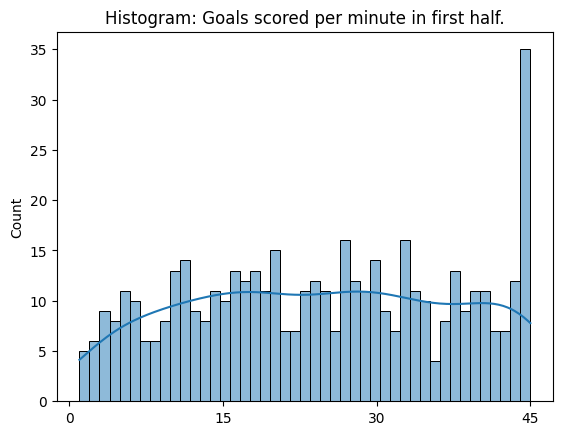

In [30]:
sns.histplot(data=np.array(first_half), bins=45, stat='count', kde=True)
plt.xticks(ticks=[0, 15, 30, 45])
plt.title('Histogram: Goals scored per minute in first half.')
plt.show()

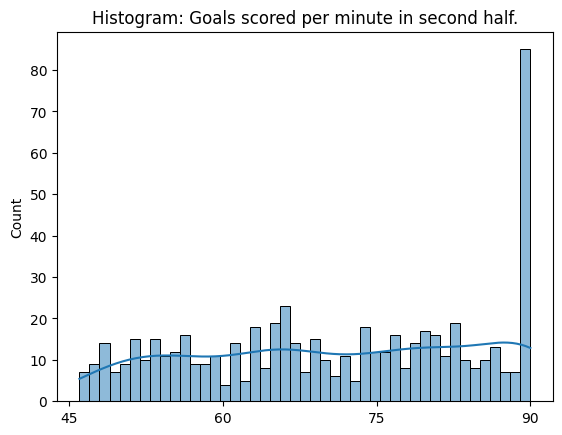

In [31]:
sns.histplot(data=np.array(second_half), bins=45, stat='count', kde=True)
plt.xticks(ticks=[45, 60, 75, 90])
plt.title('Histogram: Goals scored per minute in second half.')
plt.show()